# AVANCE II  PROYECTO INTEGRADOR

Grupo: 001, Lunes-Miércoles-Viernes/6:00pm-7:00pm¶
Equipo 7
- Josias de la Cruz Cruz               1750176
- Carlos Abraham Murillo Valdés        1488911
- Luisa Rubí Villegas Rincón           175257

Base de datos: Novel Corona Virus 2019 Dataset

### Descripción de la base de datos
La base de datos con la que se va a estar trabajando contiene información general a nivel mundial acerca del virus COVID-19.
Trabajaremos en esta base de datos con el objetivo de determinar distintas probabilidades que puede generar este virus.

In [120]:
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import datetime
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [122]:
covid_2019 = pd.read_csv("covid_19_data.csv") 
covid_2019.shape # Nos muestra el tamaño de nuestra base de datos

(19286, 8)

In [123]:
covid_2019.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [124]:
new_covid_2019 = covid_2019.rename(columns={'Country/Region':'Country'})
new_covid_2019.head()

,SNo,ObservationDate,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [125]:
new_covid_2019.Country.unique().shape

(220,)

In [126]:
new_covid_2019.Confirmed.sum()

64440602.0

In [127]:
(new_covid_2019['Country'].unique())

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

Enter Name of Country

In [128]:
name ='US'

In [129]:
df = new_covid_2019[new_covid_2019['Country'] ==  name]

In [130]:
df.head()

,SNo,ObservationDate,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
31,32,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
69,70,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0
117,118,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0
118,119,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
158,159,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0


In [131]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SNo,3714.0,9589.620355,5375.548211,32.0,4667.25,9292.0,14164.75,19282.0
Confirmed,3714.0,4707.642165,19723.745015,0.0,3.00,171.0,2046.00,291996.0
Deaths,3714.0,214.431879,1269.831879,0.0,0.00,3.0,52.00,22668.0
Recovered,3714.0,370.712439,5053.308023,0.0,0.00,0.0,0.00,111424.0


Report of Data

In [132]:
from pandas_profiling import ProfileReport 
report = ProfileReport(df)
report

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,9
Number of observations,3714
Total Missing (%),0.0%
Total size in memory,261.3 KiB
Average record size in memory,72.0 B
Numeric,3
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,3


Country on World Map

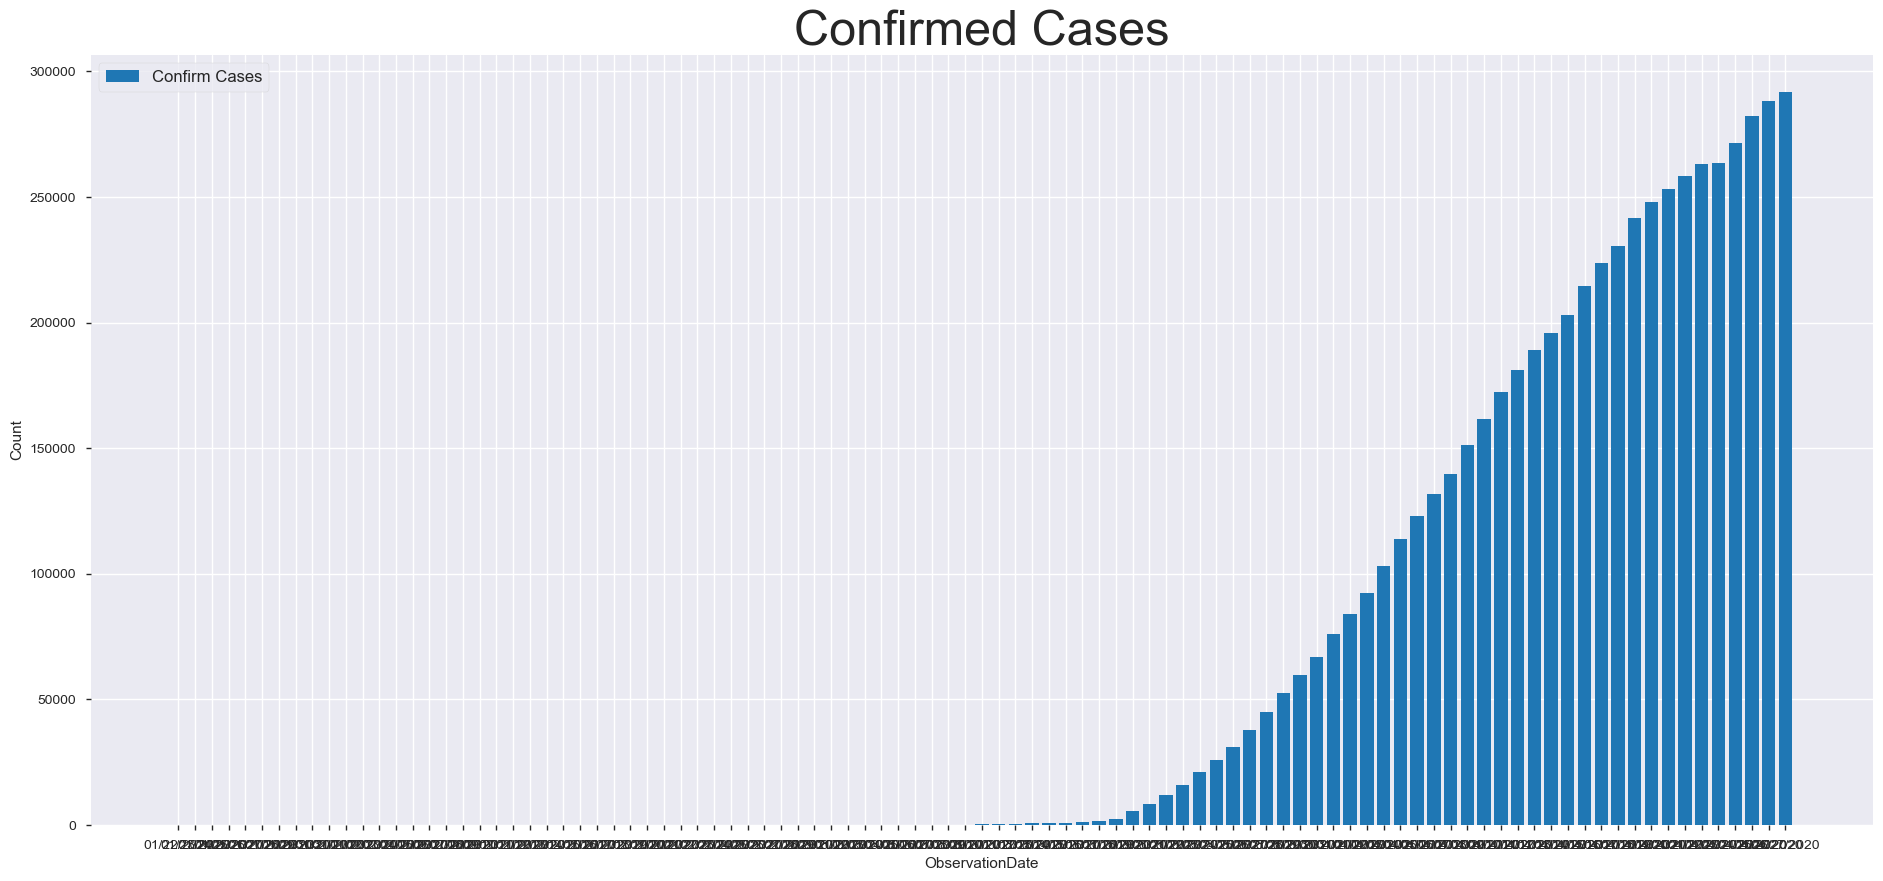

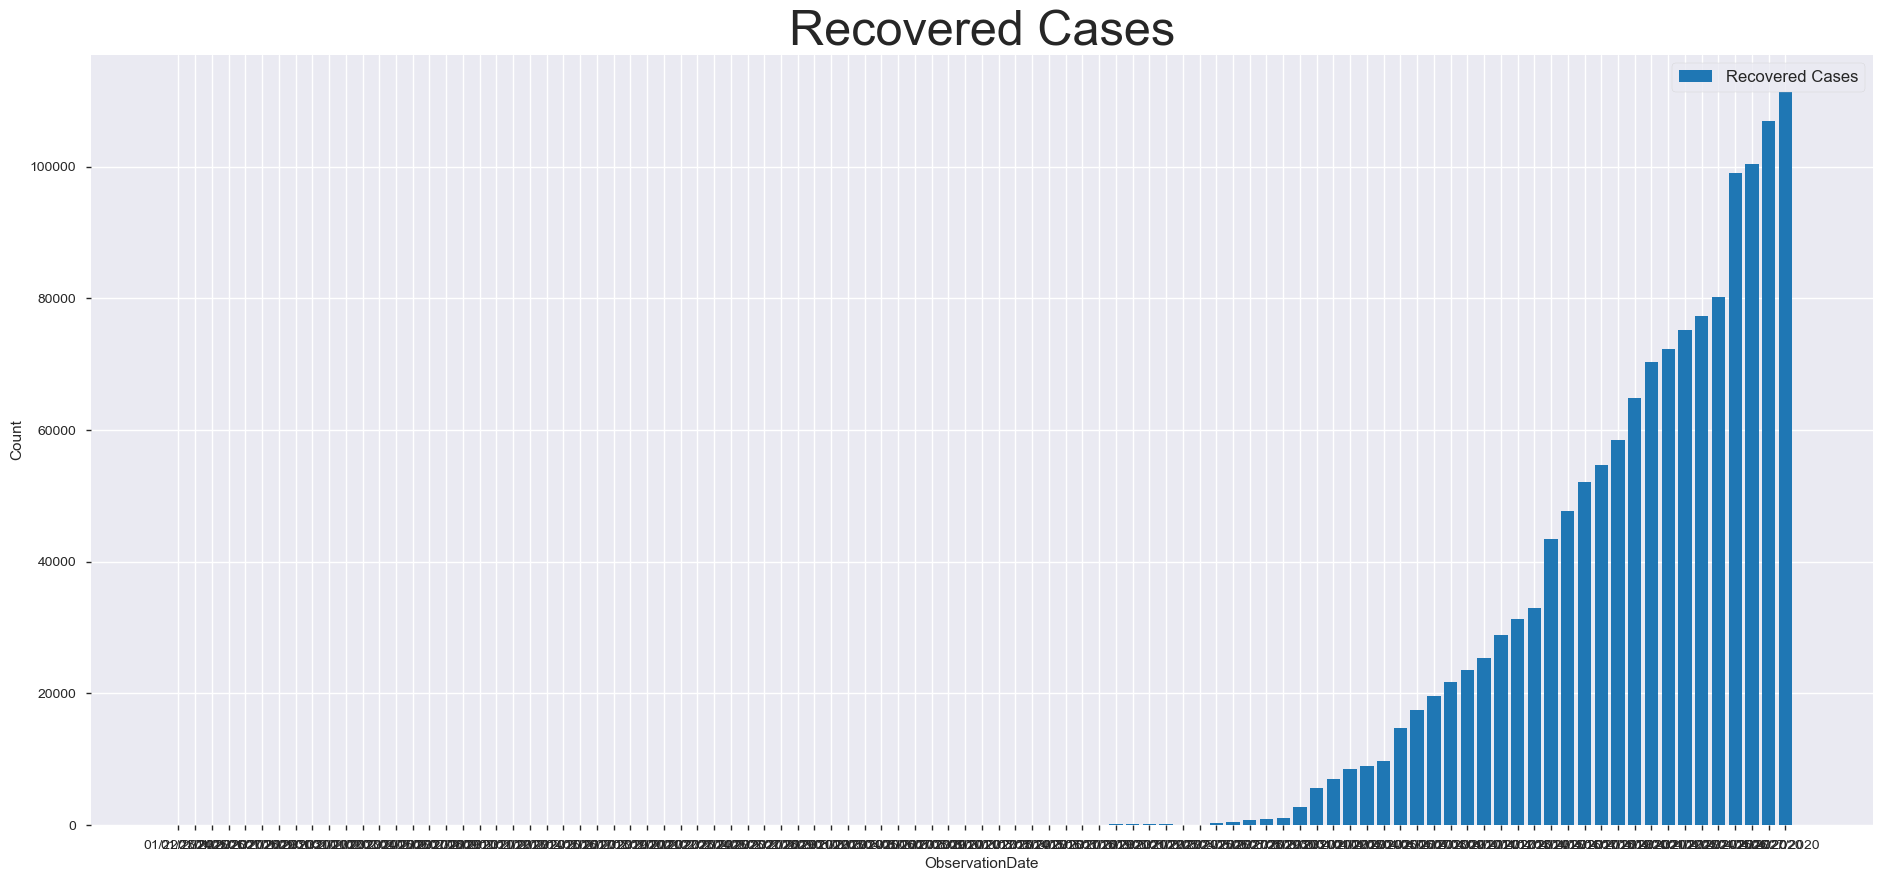

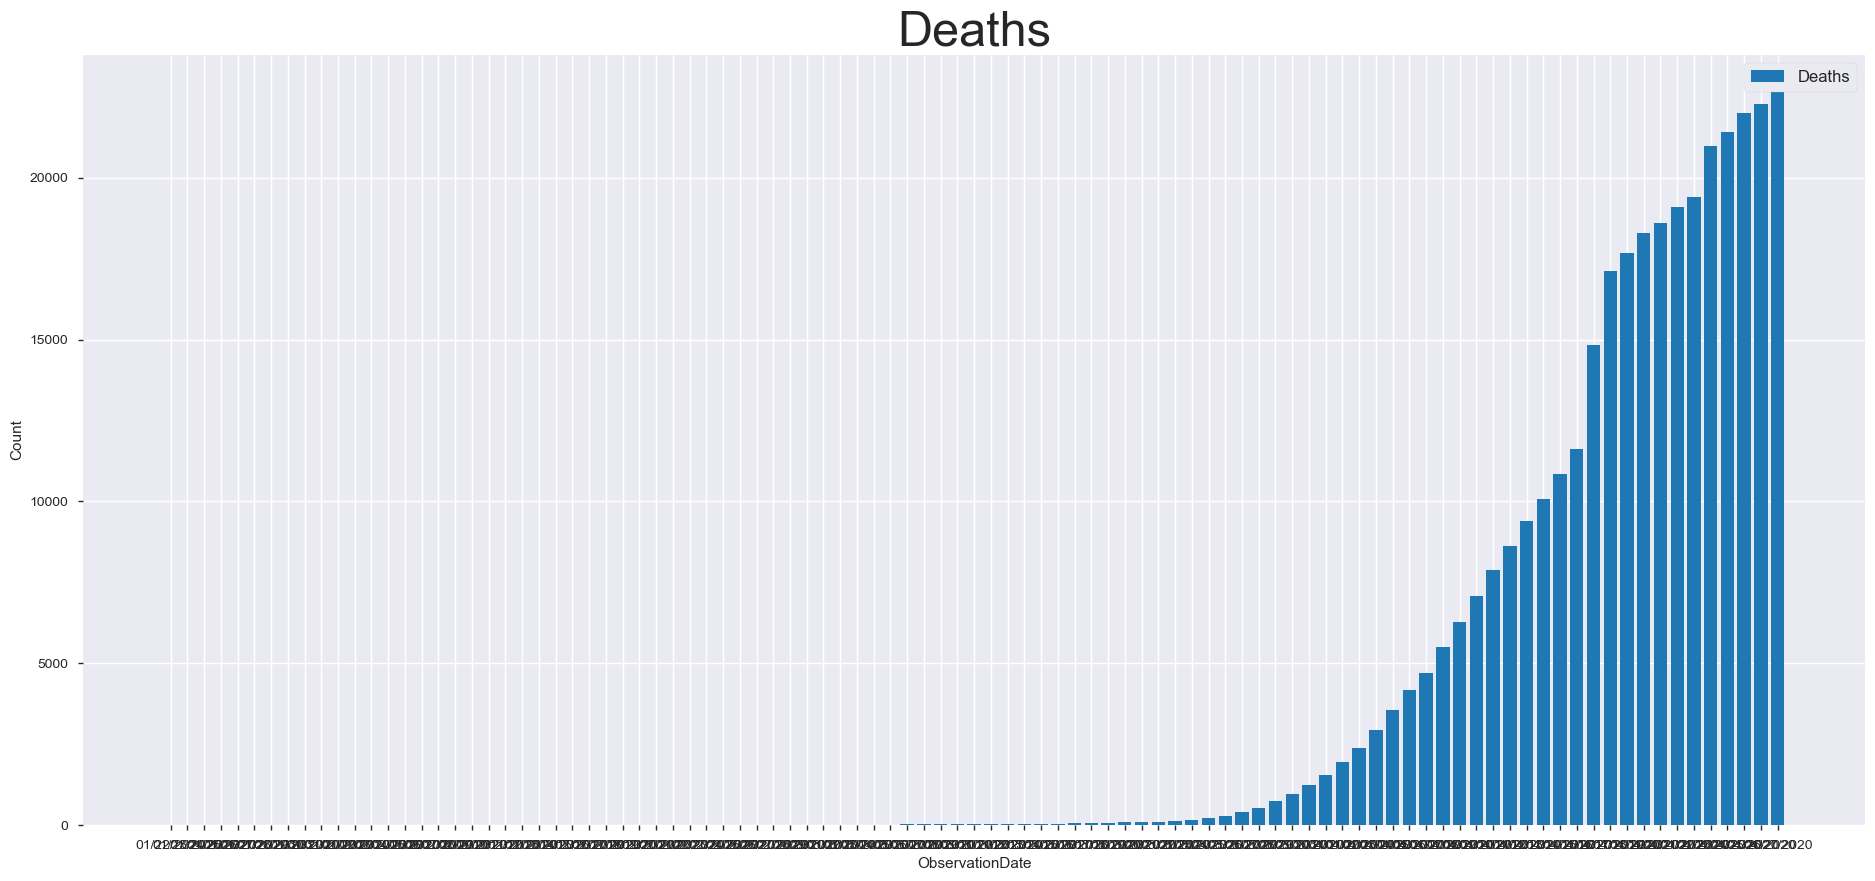

In [133]:
p = df
df= p.tail(14)
plt.figure(figsize=(23,10))
plt.bar(p.ObservationDate, p.Confirmed,label="Confirm Cases")
plt.xlabel('ObservationDate')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirmed Cases',fontsize = 35)
plt.show()

plt.figure(figsize=(23,10))
plt.bar(p.ObservationDate, p.Recovered,label="Recovered Cases")
plt.xlabel('ObservationDate')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Recovered Cases',fontsize = 35)
plt.show()

plt.figure(figsize=(23,10))
plt.bar(p.ObservationDate, p.Deaths,label="Deaths")
plt.xlabel('ObservationDate')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Deaths',fontsize = 35)
plt.show()

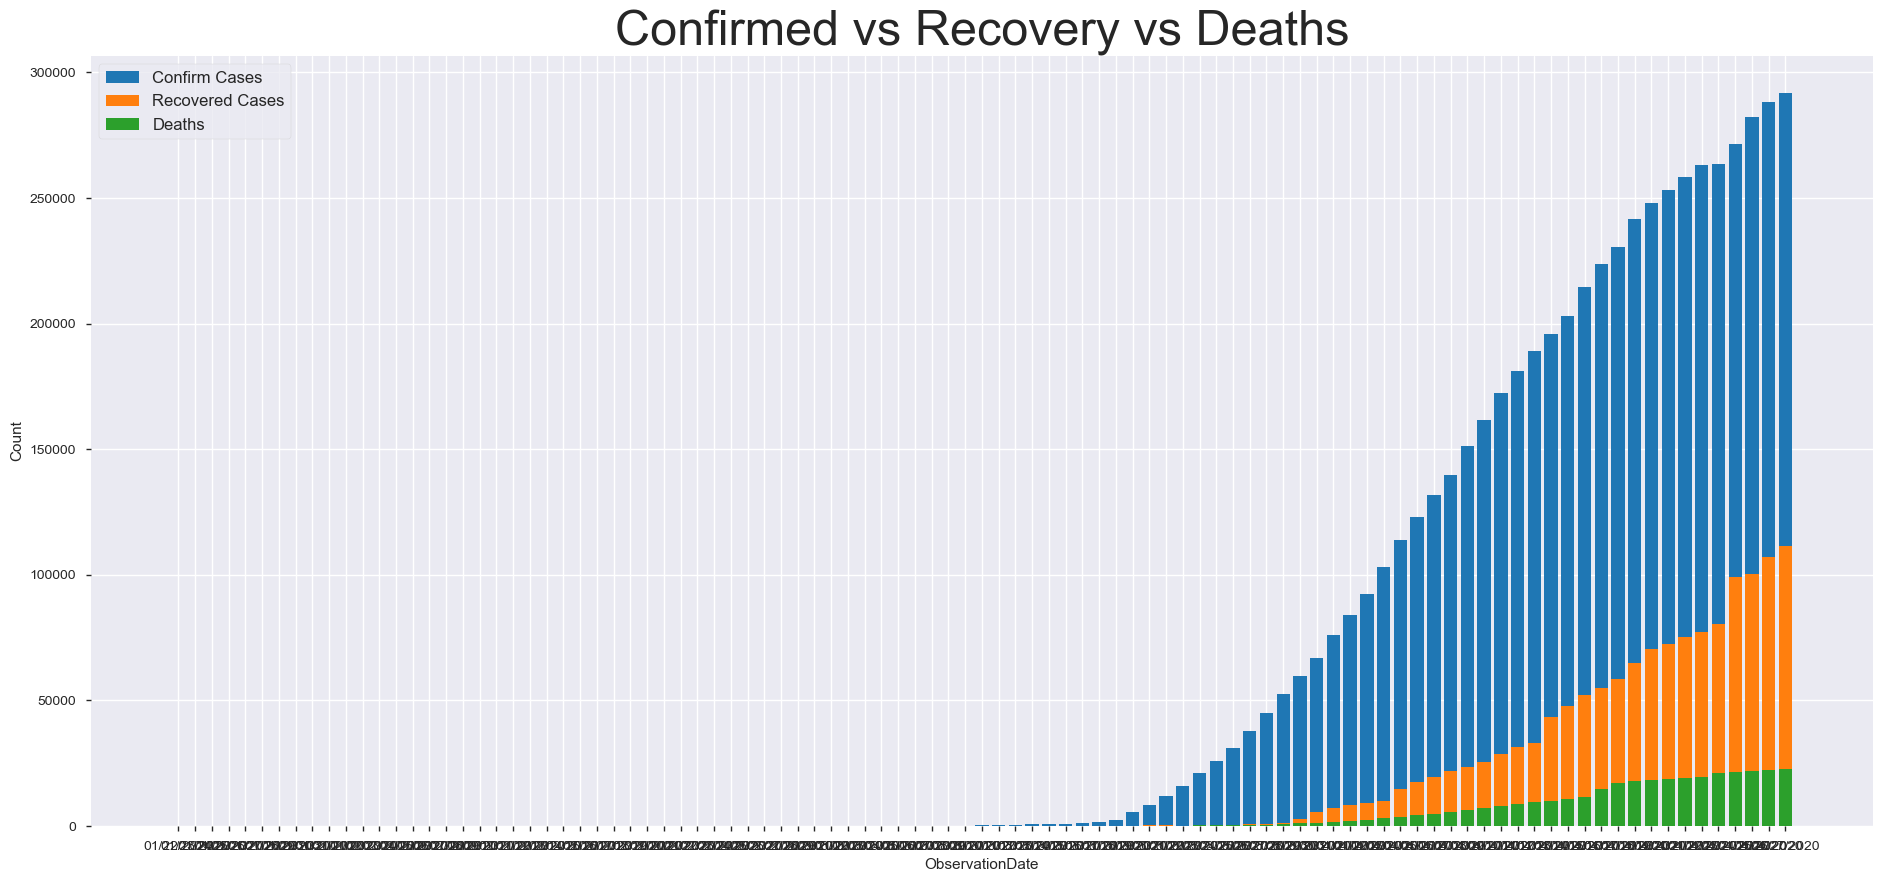

In [136]:
plt.figure(figsize=(23,10))
plt.bar(p.ObservationDate, p.Confirmed,label="Confirm Cases")
plt.bar(p.ObservationDate, p.Recovered,label="Recovered Cases")
plt.bar(p.ObservationDate, p.Deaths,label="Deaths")
plt.xlabel('ObservationDate')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirmed vs Recovery vs Deaths',fontsize = 35)
plt.show()